In [ ]:
#pip install pmdarima

# Estimation par un modèle ARIMA(p,d,q)

#### Cadre théorique: 
Un modèle autoréfressif intégré à moyennes mobiles (ARIMA) est une généralisation du modèle ARMA 
Ces deux modèles sont adaptés aux données de séries chronologiques, soit pour mieux les comprendre, soit pour prévoir les points futurs de la série. Les modèles ARIMA sont appliqués dans certains cas où les données montrent une non-stationnarité, où une étape de différenciation initiale (correspondant à la partie "intégrée" du modèle) peut être appliquée une ou plusieurs fois pour éliminer la non-stationnarité.
Dans le modèle de base, trois paramètres(p,d,q) sont utilisés pour paramétrer les modèles *ARIMA*. Par conséquent, un modèle ARIMA est noté ARIMA(p,d,q).Plus exeactement nous utiliserons les modèles de type SARIMA qui permettent de prendre en compte la modélisation directe de la composante saisonnière de la série.

In [43]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import itertools
import sys
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import sys
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
# statistical modeling libraries
import statsmodels.formula.api as smf
import scipy.stats as scs
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv
import pmdarima as pm
from statistics import *

Dans le dataset ci-dessous, nous disposons des rendements de 50 titres sur la période allant 31/01/201O au 30/11/2019, nous cherchons à effectuer des prédictions à travers le modèle ARIMA (SARIMA très exactement) de valeurs futures pour ces différents titres. 
Ainsi,Pour adapter les données de série chronologique à un modèle ARIMA saisonnier avec les paramètres *ARIMA(p,d,q)(P,D,Q)s* on doit trouver les paramètres optimaux.
Cela se fait via la recherche par grille, l'exploration itérative de plusieurs valeurs possibles des paramètres.

In [2]:
data=pd.read_csv('C:/Users/missi/Documents/Cours M2 MOSEF/projet_finance2/database.csv', header=0, index_col=0, parse_dates=True, sep=',')

In [44]:
data.head()

,HESS CORP,NEWMONT GOLDCORP CORP,INTEL CORP,INTL FLAVORS & FRAGRANCES,MOSAIC CO/THE,EXELON CORP,KIMBERLY-CLARK CORP,JOHNSON & JOHNSON,BAXTER INTERNATIONAL INC,FORD MOTOR CO,...,INTL BUSINESS MACHINES CORP,WELLTOWER INC,INGERSOLL-RAND PLC,BAKER HUGHES CO,WEC ENERGY GROUP INC,OCCIDENTAL PETROLEUM CORP,WILLIAMS COS INC,UNION PACIFIC CORP,WASTE MANAGEMENT INC,CARNIVAL CORP
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,-4.479339,-9.406045,-4.901961,-3.330092,-10.413530,-6.650297,-6.780725,-2.406459,-1.857532,8.400000,...,-6.501146,-2.978339,-9.177392,12.218770,-1.786073,-3.700062,-1.138520,-5.320814,-5.205561,5.175134
2010-02-28,1.747707,14.979000,6.671663,5.883832,9.216614,-3.945733,2.273110,0.992332,-1.146032,8.302583,...,4.366228,0.168924,-1.474259,5.830389,-0.212952,1.927495,3.358925,11.804920,3.026521,8.208021
2010-03-31,6.552083,3.553801,8.572821,13.825790,4.076040,1.177829,4.661590,3.492064,2.732195,7.069847,...,0.857188,6.775259,9.276089,-2.253756,2.023539,6.302256,7.761559,8.802137,5.254409,8.120133
2010-04-30,1.598721,10.111920,2.467474,5.076568,-15.846630,-0.502169,-2.576336,-1.380368,-18.865980,3.579952,...,0.584795,-0.663277,6.051047,6.233988,6.274034,4.873433,2.207792,3.219645,0.726111,7.253087
2010-05-31,-16.286390,-4.029957,-5.550986,-11.159910,-9.626484,-10.344880,-0.914137,-8.501832,-10.567560,-9.907834,...,-2.389900,-2.517121,0.892374,-23.101220,-5.965246,-6.936612,-16.349000,-5.146491,-5.353629,-12.882820


#### A-Estimation des titre INTEL CORP
Nous allons éfféctuer une étude complete sur un série (un titre), ensuite généraliserons notre étude à l'ensemble des titres.

In [45]:
df=data[["INTEL CORP"]]
df.head()

,INTEL CORP
Date,
2010-01-31,-4.901961
2010-02-28,6.671663
2010-03-31,8.572821
2010-04-30,2.467474
2010-05-31,-5.550986


In [46]:
y = df['INTEL CORP']

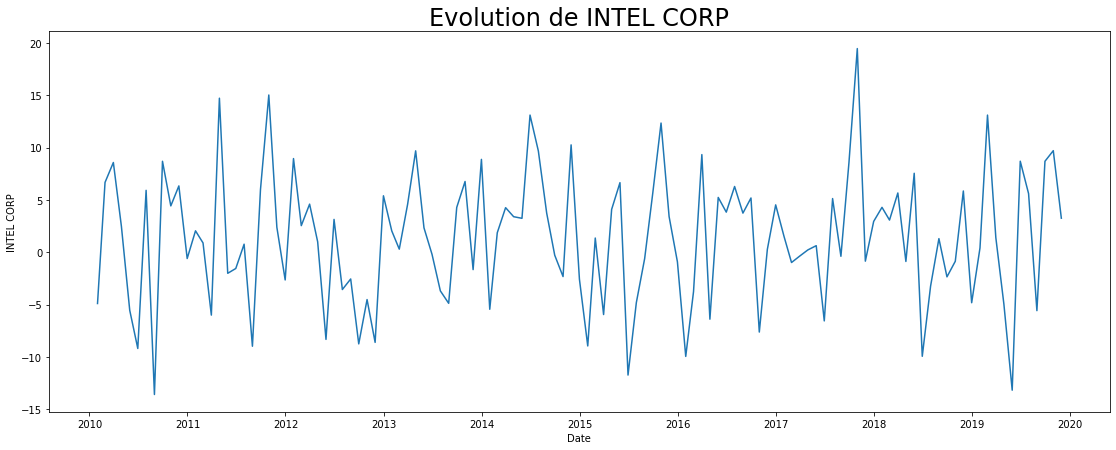

In [47]:
# simple line plot
fig = plt.figure(figsize=(19, 7))
plt.plot(df)
plt.title('Evolution de INTEL CORP', fontsize=24)
plt.ylabel('INTEL CORP')
plt.xlabel('Date')
plt.show()

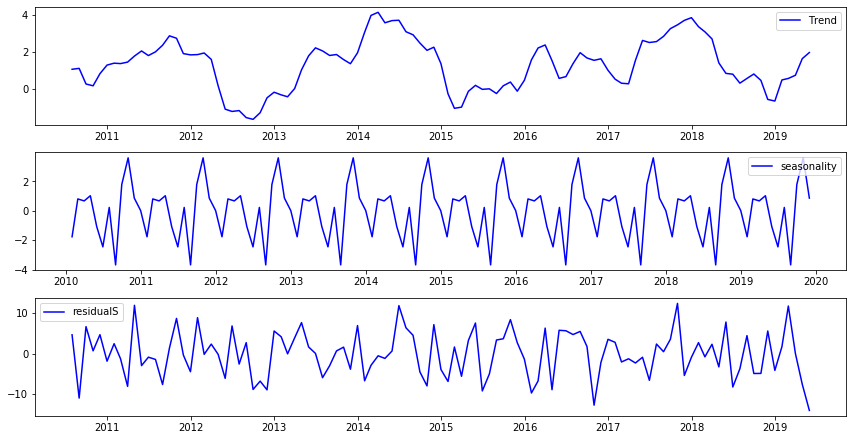

In [48]:
decomposition=seasonal_decompose(y)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(trend,label='Trend',color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal,label='seasonality',color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(residual,label='residualS',color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### Tendance 
 Une façon d'identifier la tendance consiste à utiliser des moyennes mobiles sur une fenêtre   d'observations. Nous pouvons observer sur les résulatst ci-dessous que, lorsque la fenêtre de la moyenne mobile est augmentée, la courbe devient plus lisse.

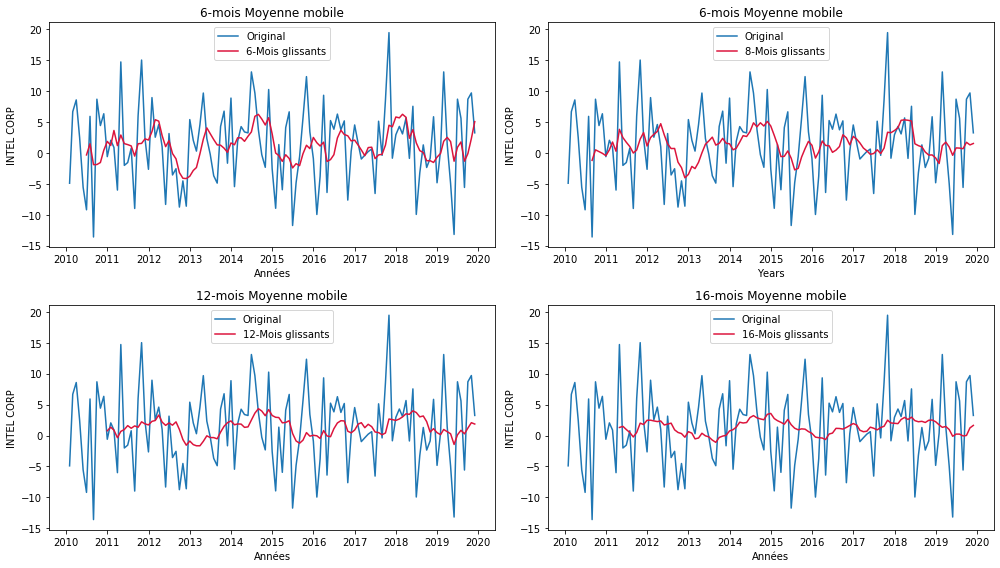

In [49]:
#Etudier la tendance = Une façon d'identifier la tendance consiste à utiliser des moyennes mobiles sur une fenêtre d'observations.
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);
 
# push data to each ax
#upper left
axes[0][0].plot(y.index, y, label='Original');
axes[0][0].plot(y.index, y.rolling(window=6).mean(), label='6-Mois glissants', color='crimson');
axes[0][0].set_xlabel("Années");
axes[0][0].set_ylabel("INTEL CORP");
axes[0][0].set_title("6-mois Moyenne mobile");
axes[0][0].legend(loc='best');
 
# upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=8).mean(), label='8-Mois glissants', color='crimson');
axes[0][1].set_xlabel("Years");
axes[0][1].set_ylabel("INTEL CORP");
axes[0][1].set_title("6-mois Moyenne mobile");
axes[0][1].legend(loc='best');
 
# lower left
axes[1][0].plot(y.index, y, label='Original');
axes[1][0].plot(y.index, y.rolling(window=12).mean(), label='12-Mois glissants', color='crimson');
axes[1][0].set_xlabel("Années");
axes[1][0].set_ylabel("INTEL CORP");
axes[1][0].set_title("12-mois Moyenne mobile");
axes[1][0].legend(loc='best');
 
# lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=16).mean(), label='16-Mois glissants', color='crimson');
axes[1][1].set_xlabel("Années");
axes[1][1].set_ylabel("INTEL CORP");
axes[1][1].set_title("16-mois Moyenne mobile");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.show()

#### Differenciation
A la différence des modèles ARIMA simple qui eux ne tiennent pas compte la saisonnalité,les SARIMA eux utilisent la différenciation saisonnière pour rendre la série stationnaire.
Le programme ci-dessous va permettre de différencier la série (le titre INTEL CORP).

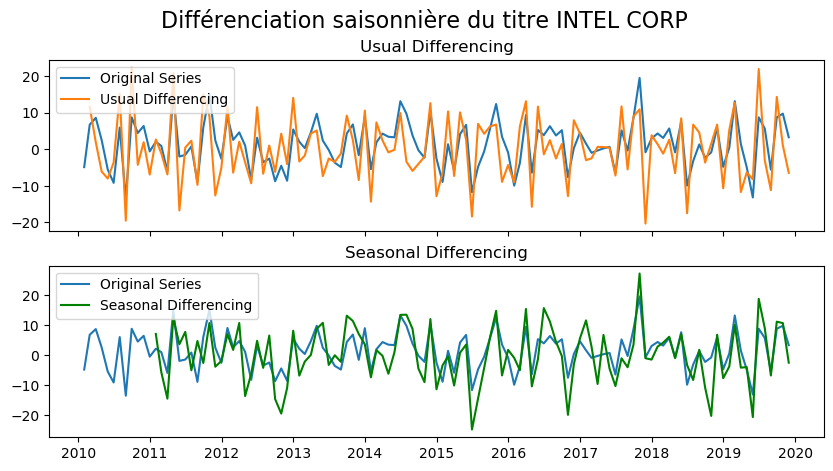

In [50]:
# Import
data=df
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)
# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Différenciation saisonnière du titre INTEL CORP', fontsize=16)
plt.show()

Nous pouvons oberver sur les graphiques ci-dessus que les pointes saisonnières ne changent pas après application de la différenciation habituelle (décalage 1). Par contre, il est rectifié après différenciation saisonnière.

les fonctions ***evaluate_arima_model***, ***evaluate_models*** ci-dessous ont été construite pour nous permettre de trouver les paramètres *(p,d,q)* optimaux du modèle ARIMA pour chaque titre. 

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

Nous commençons par générer valeurs possibles des paramètres que nous aimerions évaluer. 

In [ ]:
series=y
# evaluate parameters ATTENTION: l'optimisation peut durer jusqu'à 15 minutes environ 
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values) #Best ARIMA(2, 0, 1) MSE=37.110

Nous obervons sur les résulats des itérations ci-dessus que le meilleurs modèles au regard des paramètres otenus 
et du MSE (erreur quadrique moyenne) sont les modèles ARIMA(2, 0, 1) pour le titre ***INTEL CORP*** 
Parconséquent,Nous allons donc estimés puis effectuer la prédiction à partir du modèle ARIMA(2, 0, 1)

Nous pouvons également utiliser la fonction *auto_arima* ci-dessous pour obtenir les paramètres optimaux (p,d,q) du modèle ARIMA.Cette méthode nous propose un modèle avec un AIC de 728.326.On retiendra le modèle *SARIMAX(0,1,1,12)* proposé par la seconde méthode d'optimisation car nous avons vu à travers la différenciation précédente qu'il fallait tenir compte des effets saisonniers et ce sont les modèles SARIMA qui permettent de prendre en compte cette information.

In [8]:
# Seasonal - fit stepwise auto-ARIMA
smodel=pm.auto_arima(y, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=731.605, BIC=744.969, Time=1.072 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=784.833, BIC=790.178, Time=0.030 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=738.467, BIC=749.159, Time=0.442 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=730.326, BIC=741.017, Time=1.033 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=782.851, BIC=785.524, Time=0.020 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=784.629, BIC=795.320, Time=0.205 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=731.884, BIC=747.921, Time=0.870 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  119
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -361.163
Date:                    Tue, 21 Apr 2020   AIC                            728.326
Time:                            22:48:39   BIC                            736.344
Sample:                                 0   HQIC                           731.577
                                    - 119                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0904      0.200      0.452      0.652      -0.302       0.483
ma.S.L12      -0.9993     35.129     -0.028      0.977     -69.852      67.853
sigma2        38.7149   1360.078      0.028      0.977   -2626.989    2704.419
===================================================================================
Ljung-Box (Q):                       52.60   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.09   Prob(JB):                         0.37
Heteroskedasticity (H):               1.03   Skew:                            -0.17
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
#Subdiviser en echantillon de test et echantillon de training
y_train = y[:'2016-12-31']
y_test = y['2017-01-31':]

In [16]:
# Estimation du modèle ARIMA(2, 0, 1)
mdl = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

# print statistics
print(res.aic)
print(res.summary())

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


497.33861110588975
                                 SARIMAX Results                                  
Dep. Variable:                 INTEL CORP   No. Observations:                   84
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -246.669
Date:                    Sat, 25 Apr 2020   AIC                            497.339
Time:                            11:40:42   BIC                            501.892
Sample:                        01-31-2010   HQIC                           499.151
                             - 12-31-2016                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7801      0.210     -3.716      0.000      -1.192      -0.369
sigma2        47.6067     12.651      3.763      0.000      22.811      72.402
L

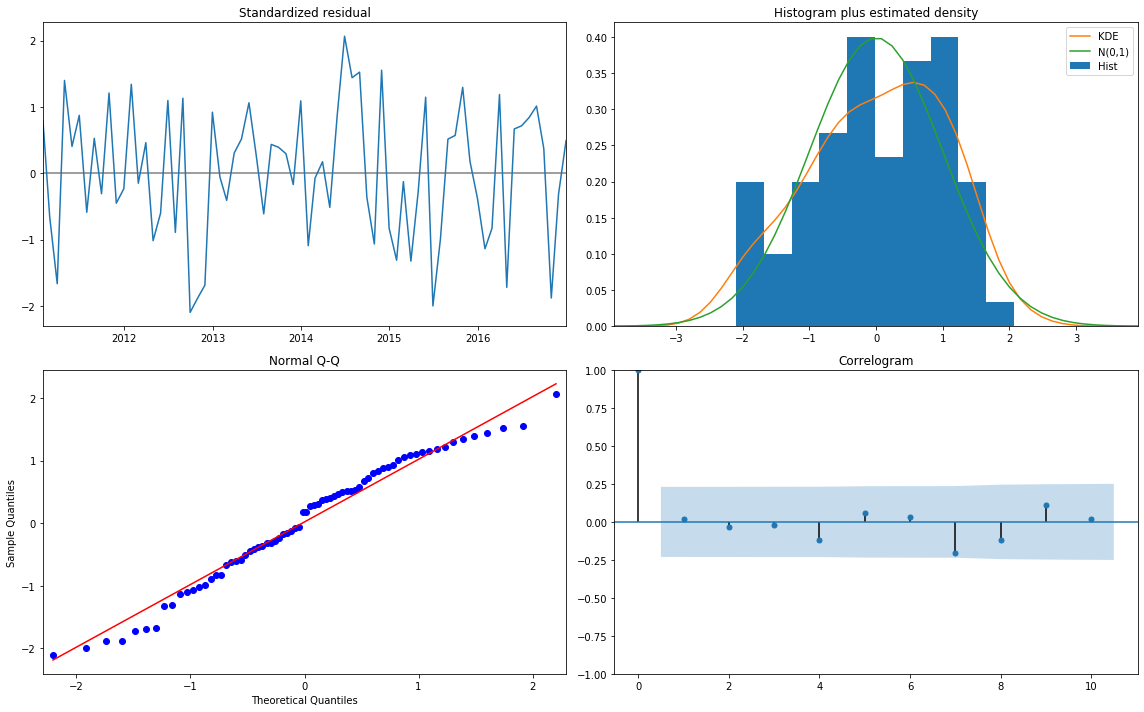

In [17]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

#### Interpretation des résulats:
*En haut à gauche:* les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro et présentent une variance uniforme.
*En haut à droite:* le graphique de densité suggère une distribution normale mais qui n'est pas tout à fait centrée sur zéro. 
*En bas à gauche:* On observe que les points ne sont pas tout à fait alignés sur la droite.Tout écart significatif impliquerait que la distribution est biaisée.
*En bas à droite:* Nous avons le graphique de l'autocorrélation (ACF). Il montre que les erreurs résiduelles ne sont pas corrélées. Toute autocorrélation impliquerait qu'il y a un modèle dans les erreurs résiduelles qui n'est pas expliqué dans le modèle.
Les résultats sont satisfaisiants dans l'ensemble, nous pouvons donc effectuer la prédiction pour le titre ***INTEL CORP***

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


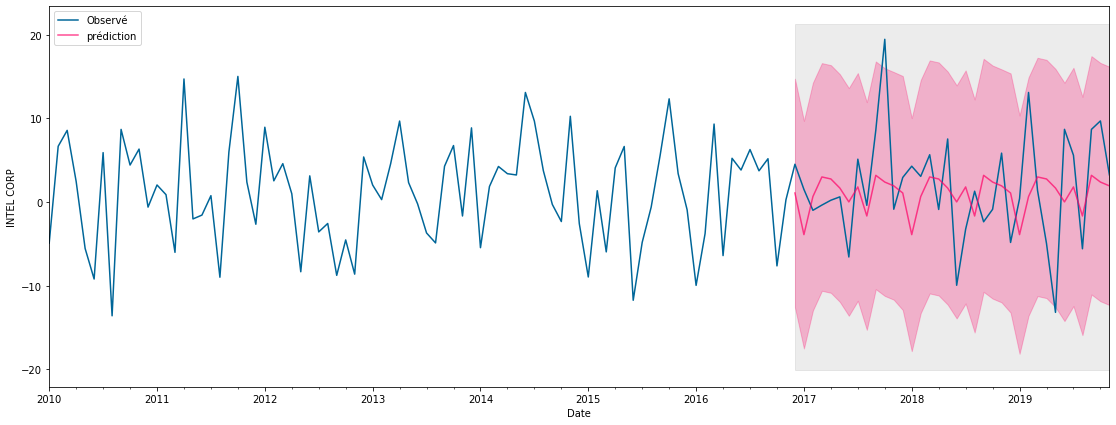

In [18]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-12-31'), 
                          end=pd.to_datetime('2019-11-30'),
                          dynamic=True)
pred_ci = pred.conf_int()

# plot in-sample-prediction
fig = plt.figure(figsize=(19, 7))
ax = y['2010':].plot(label='Observé',color='#006699');
pred.predicted_mean.plot(ax=ax, label='prédiction', alpha=.7, color='#ff0066');

# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-12-31'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('INTEL CORP');
plt.legend(loc='upper left');
plt.show()

In [52]:
y_hat = pred.predicted_mean
y_true = y['2016-12-31':]

# compute the mean square error
mse = ((y_hat-y_true)**2).mean()
print('Qualité de la prédiction : {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Qualité de la prédiction : 40.27 MSE (6.35 RMSE)


C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


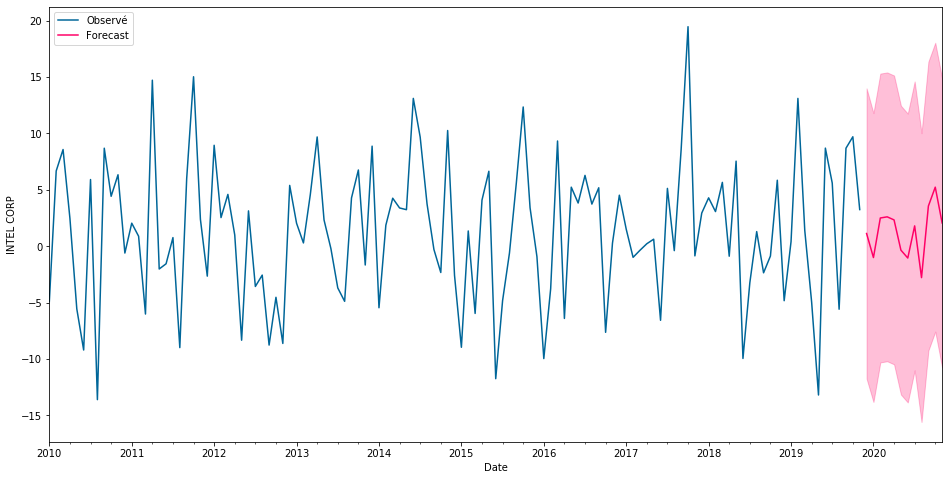

In [53]:
# une prevision sur une année (12 mois) 
# build model and fit
res = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# get forecast 120 steps ahead in future
pred_uc = res.get_forecast(steps=12)

# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# plot time series and long-term forecast
ax = y.plot(label='Observé', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('INTEL CORP');
plt.legend(loc='upper left')
plt.show()

In [54]:
valeurs=pred_uc.predicted_mean

# II-Géréralisation pour tous les titres 

In [60]:
data=pd.read_csv('C:/Users/missi/Documents/Cours M2 MOSEF/projet_finance2/database.csv', header=0, index_col=0, parse_dates=True, sep=',')

In [61]:
print(data.isnull().sum())

HESS CORP                        0
NEWMONT GOLDCORP CORP            0
INTEL CORP                       0
INTL FLAVORS & FRAGRANCES        0
MOSAIC CO/THE                    0
EXELON CORP                      0
KIMBERLY-CLARK CORP              0
JOHNSON & JOHNSON                0
BAXTER INTERNATIONAL INC         0
FORD MOTOR CO                    0
CHEMOURS CO/THE                 65
CONOCOPHILLIPS                   0
WELLS FARGO & CO                 0
WEYERHAEUSER CO                  0
TARGET CORP                      0
3M CO                            0
GENERAL MOTORS CO               10
CUMMINS INC                      0
HASBRO INC                       0
DUKE ENERGY CORP                 0
EASTMAN CHEMICAL CO              0
BANK OF NEW YORK MELLON CORP     0
DOMTAR CORP                      0
ECOLAB INC                       0
SCHLUMBERGER LTD                 0
UNITED PARCEL SERVICE-CL B       0
AT&T INC                         0
NORFOLK SOUTHERN CORP            0
PPL CORP            

In [62]:
print(data.isnull().sum().sum())

75


In [63]:
data['CHEMOURS CO/THE'].fillna(data['CHEMOURS CO/THE'].median(), inplace=True)
data['GENERAL MOTORS CO'].fillna(data['GENERAL MOTORS CO'].median(), inplace=True)

In [64]:
print(data.isnull().sum().sum())

0


Dans la boucle ci-dessous, nous avons écrit une boucle qui permet de générer pour chaque colonne(chaque tite), les paramètres optimaux (p,q,d) du modèle *ARIMA* ou *SARIMA* correspand. C'est paramètres vont nous permettre d'effectuer la prédiction pour chacun des titre dans l'étape suivante:

In [13]:
for i in list(data.columns[0:51]):
    print(i)
    smodel=pm.auto_arima(data[i], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
    print(smodel.summary())

WASTE MANAGEMENT INC
Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=644.261, BIC=657.625, Time=1.464 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=701.070, BIC=706.416, Time=0.027 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=670.788, BIC=681.479, Time=0.325 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=648.520, BIC=659.211, Time=1.141 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=699.082, BIC=701.754, Time=0.022 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=695.602, BIC=706.294, Time=0.593 seconds
Near non-invertible roots for order (1, 0, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) 

In [66]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,0],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_1=pred.predicted_mean
serie_1=pd.DataFrame(serie_1)
serie_1.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,2.287322
2016-02-29,6.133116
2016-03-31,-0.337825
2016-04-30,2.102767
2016-05-31,-9.489187


In [67]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,1],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_2=pred.predicted_mean
serie_2=pd.DataFrame(serie_2)
serie_2.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,0.343718
2016-02-29,3.026860
2016-03-31,-3.589115
2016-04-30,2.621670
2016-05-31,-1.286263


In [68]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,2],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_3=pred.predicted_mean
serie_3=pd.DataFrame(serie_3)
serie_3.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-1.046576
2016-02-29,2.268114
2016-03-31,1.672416
2016-04-30,5.892302
2016-05-31,-0.612968


In [69]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,3],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_4=pred.predicted_mean
serie_4=pd.DataFrame(serie_4)
serie_4.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,0
2016-01-31,3.053063
2016-02-29,6.875319
2016-03-31,3.869977
2016-04-30,1.351113
2016-05-31,-0.380025


In [70]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,4],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_5=pred.predicted_mean
serie_5=pd.DataFrame(serie_5)
serie_5.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,3.226747
2016-02-29,6.154915
2016-03-31,-4.181271
2016-04-30,-3.125206
2016-05-31,-1.344696


In [71]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,5],
order=(1,0,2),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_6=pred.predicted_mean
serie_6=pd.DataFrame(serie_6)
serie_6.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.176937
2016-02-29,-0.194201
2016-03-31,3.887890
2016-04-30,2.846515
2016-05-31,-3.682531


In [72]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,6],
order=(2,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_7=pred.predicted_mean
serie_7=pd.DataFrame(serie_7)
serie_7.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.046125
2016-02-29,0.596408
2016-03-31,3.011358
2016-04-30,1.913104
2016-05-31,-0.428391


In [73]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,7],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_8=pred.predicted_mean
serie_8=pd.DataFrame(serie_8)
serie_8.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-1.189885
2016-02-29,2.723832
2016-03-31,2.233619
2016-04-30,2.451030
2016-05-31,-1.022046


In [74]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,8],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_9=pred.predicted_mean
serie_9=pd.DataFrame(serie_9)
serie_9.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.270953
2016-02-29,1.373675
2016-03-31,3.817360
2016-04-30,-1.891393
2016-05-31,-1.160172


In [75]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,9],
order=(0,0,0),
seasonal_order=(1,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_10=pred.predicted_mean
serie_10=pd.DataFrame(serie_10)
serie_10.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.723702
2016-02-29,1.380755
2016-03-31,1.880483
2016-04-30,1.487079
2016-05-31,1.129118


In [76]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,10],
order=(0,1,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_11=pred.predicted_mean
serie_11=pd.DataFrame(serie_11)
serie_11.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-11.459810
2016-02-29,-11.459804
2016-03-31,-11.459804
2016-04-30,-11.459804
2016-05-31,-11.459880


In [77]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,11],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_12=pred.predicted_mean
serie_12=pd.DataFrame(serie_12)
serie_12.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-4.263575
2016-02-29,5.475191
2016-03-31,2.078972
2016-04-30,4.095491
2016-05-31,-2.296896


In [78]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,12],
order=(0,0,0),
seasonal_order=(1,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_13=pred.predicted_mean
serie_13=pd.DataFrame(serie_13)
serie_13.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,0.013547
2016-02-29,3.381807
2016-03-31,5.313761
2016-04-30,0.342642
2016-05-31,2.963691


In [79]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,13],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_14=pred.predicted_mean
serie_14=pd.DataFrame(serie_14)
serie_14.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,4.798768
2016-02-29,2.207361
2016-03-31,2.836197
2016-04-30,-1.162183
2016-05-31,0.038327


In [80]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,14],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_15=pred.predicted_mean
serie_15=pd.DataFrame(serie_15)
serie_15.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-2.505395
2016-02-29,5.084254
2016-03-31,2.057334
2016-04-30,1.152618
2016-05-31,-1.508037


In [81]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,15],
order=(1,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_16=pred.predicted_mean
serie_16=pd.DataFrame(serie_16)
serie_16.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.503337
2016-02-29,3.529460
2016-03-31,1.382743
2016-04-30,1.009881
2016-05-31,-0.971040


In [82]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,16],
order=(0,0,2),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_17=pred.predicted_mean
serie_17=pd.DataFrame(serie_17)
serie_17.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.322933
2016-02-29,3.284978
2016-03-31,-1.474664
2016-04-30,-0.343264
2016-05-31,1.459498


In [83]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,17],
order=(1,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_18=pred.predicted_mean
serie_18=pd.DataFrame(serie_18)
serie_18.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,3.618525
2016-02-29,9.136858
2016-03-31,2.840789
2016-04-30,2.581017
2016-05-31,-3.417554


In [84]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,18],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_19=pred.predicted_mean
serie_19=pd.DataFrame(serie_19)
serie_19.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.376814
2016-02-29,9.926751
2016-03-31,3.608805
2016-04-30,5.938040
2016-05-31,-1.230976


In [86]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,19],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_20=pred.predicted_mean
serie_20=pd.DataFrame(serie_20)
serie_20.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.281801
2016-02-29,-0.654907
2016-03-31,0.697586
2016-04-30,2.798051
2016-05-31,-2.138635


In [87]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,20],
order=(0,0,0),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_21=pred.predicted_mean
serie_21=pd.DataFrame(serie_21)
serie_21.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,4.619833
2016-02-29,4.782233
2016-03-31,0.614777
2016-04-30,4.006173
2016-05-31,-2.535613


In [88]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,21],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_22=pred.predicted_mean
serie_22=pd.DataFrame(serie_22)
serie_22.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-1.686171
2016-02-29,3.555126
2016-03-31,5.382792
2016-04-30,0.734917
2016-05-31,-1.150978


In [89]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,22],
order=(0,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_23=pred.predicted_mean
serie_23=pd.DataFrame(serie_23)
serie_23.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,5.257759
2016-02-29,5.146214
2016-03-31,5.937561
2016-04-30,-5.682959
2016-05-31,-1.745563


In [90]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,23],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_24=pred.predicted_mean
serie_24=pd.DataFrame(serie_24)
serie_24.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,0.680925
2016-02-29,3.202210
2016-03-31,3.084392
2016-04-30,3.037767
2016-05-31,1.095250


In [120]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,24],
order=(1,0,1),
seasonal_order=(0,1,1,12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_25=pred.predicted_mean
serie_25=pd.DataFrame(serie_25)
serie_25.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,3.684195
2016-02-29,3.479396
2016-03-31,-0.291474
2016-04-30,6.242892
2016-05-31,-5.764102


In [92]:
res = sm.tsa.statespace.SARIMAX(data.iloc[:,25],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_26=pred.predicted_mean
serie_26=pd.DataFrame(serie_26)
serie_26.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-4.227809
2016-02-29,3.123940
2016-03-31,0.856491
2016-04-30,1.750231
2016-05-31,0.137811


In [93]:
#S26
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,26],
order=(2, 0, 2),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_27=pred.predicted_mean
serie_27=pd.DataFrame(serie_27)
serie_27.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.749376
2016-02-29,2.592484
2016-03-31,1.405355
2016-04-30,4.720731
2016-05-31,-0.247936


In [95]:

# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,27],
order=(3, 0, 1),
seasonal_order=(0, 1, 2, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_28=pred.predicted_mean
serie_28=pd.DataFrame(serie_28)
serie_28.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-3.921933
2016-02-29,4.439365
2016-03-31,3.500370
2016-04-30,3.780875
2016-05-31,-2.828479


In [96]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,28],
order=(2, 0, 1),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_29=pred.predicted_mean
serie_29=pd.DataFrame(serie_29)
serie_29.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-1.549666
2016-02-29,0.317532
2016-03-31,1.114932
2016-04-30,0.655706
2016-05-31,0.562698


In [97]:
#S30
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,29],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_30=pred.predicted_mean
serie_30=pd.DataFrame(serie_30)
serie_30.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.151877
2016-02-29,3.963491
2016-03-31,1.672102
2016-04-30,4.017002
2016-05-31,0.837701


In [98]:

# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,30],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_31=pred.predicted_mean
serie_31=pd.DataFrame(serie_31)
serie_31.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,8.006409
2016-02-29,8.076149
2016-03-31,3.807488
2016-04-30,0.279501
2016-05-31,-2.835159


In [99]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,31],
order=(0, 0, 1),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_32=pred.predicted_mean
serie_32=pd.DataFrame(serie_32)
serie_32.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.778096
2016-02-29,4.461628
2016-03-31,2.955683
2016-04-30,1.968936
2016-05-31,-3.036392


In [100]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,32],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_33=pred.predicted_mean
serie_33=pd.DataFrame(serie_33)
serie_33.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-0.711997
2016-02-29,4.610049
2016-03-31,1.072389
2016-04-30,2.331313
2016-05-31,0.038194


In [101]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,33],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_34=pred.predicted_mean
serie_34=pd.DataFrame(serie_34)
serie_34.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-1.616462
2016-02-29,9.808217
2016-03-31,2.446275
2016-04-30,-1.466027
2016-05-31,2.329179


In [103]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,34],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_35=pred.predicted_mean
serie_35=pd.DataFrame(serie_35)
serie_35.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-3.400176
2016-02-29,4.921104
2016-03-31,1.446768
2016-04-30,3.879645
2016-05-31,-4.087728


In [104]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,35],
order=(1, 0, 1),
seasonal_order=(0, 1, 2, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_36=pred.predicted_mean
serie_36=pd.DataFrame(serie_36)
serie_36.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


,0
2016-01-31,2.554598
2016-02-29,4.421409
2016-03-31,3.990593
2016-04-30,1.605291
2016-05-31,-0.868856


In [106]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,36],
order=(0, 0, 0),
seasonal_order=(0, 1, 2, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_37=pred.predicted_mean
serie_37=pd.DataFrame(serie_37)
serie_37.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.561820
2016-02-29,3.482867
2016-03-31,3.840614
2016-04-30,4.863456
2016-05-31,-2.901418


In [107]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,37],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_38=pred.predicted_mean
serie_38=pd.DataFrame(serie_38)
serie_38.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.699803
2016-02-29,6.101987
2016-03-31,2.099281
2016-04-30,1.373603
2016-05-31,0.286998


In [109]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,38],
order=(1, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_39=pred.predicted_mean
serie_39=pd.DataFrame(serie_39)
serie_39.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,5.833476
2016-02-29,3.082538
2016-03-31,2.280413
2016-04-30,1.190657
2016-05-31,-3.342742


In [110]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,39],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_40=pred.predicted_mean
serie_40=pd.DataFrame(serie_40)
serie_40.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.499451
2016-02-29,2.146125
2016-03-31,2.900828
2016-04-30,1.527657
2016-05-31,-7.872192


In [111]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,40],
order=(2, 0, 2),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_41=pred.predicted_mean
serie_41=pd.DataFrame(serie_41)
serie_41.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,0.861592
2016-02-29,3.201814
2016-03-31,2.870481
2016-04-30,1.615415
2016-05-31,-1.907023


In [112]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,41],
order=(2, 0, 2),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_42=pred.predicted_mean
serie_42=pd.DataFrame(serie_42)
serie_42.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,2.311803
2016-02-29,4.047320
2016-03-31,3.506750
2016-04-30,-0.707035
2016-05-31,-2.184067


In [113]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,42],
order=(1, 0, 1),
seasonal_order=(0, 1, 2, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_43=pred.predicted_mean
serie_43=pd.DataFrame(serie_43)
serie_43.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,2.692268
2016-02-29,3.246230
2016-03-31,3.670874
2016-04-30,2.648243
2016-05-31,1.063375


In [114]:
#fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,43],
order=(1, 0, 1),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_44=pred.predicted_mean
serie_44=pd.DataFrame(serie_44)
serie_44.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,6.906250
2016-02-29,6.089730
2016-03-31,-0.846001
2016-04-30,5.346468
2016-05-31,-5.380306


In [115]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,44],
order=(0, 0, 1),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_45=pred.predicted_mean
serie_45=pd.DataFrame(serie_45)
serie_45.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,2.080247
2016-02-29,0.286129
2016-03-31,2.521705
2016-04-30,3.579747
2016-05-31,-2.666296


In [116]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,45],
order=(0, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_46=pred.predicted_mean
serie_46=pd.DataFrame(serie_46)
serie_46.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.312484
2016-02-29,2.141614
2016-03-31,-1.498512
2016-04-30,5.691077
2016-05-31,-3.464991


In [117]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,46],
order=(1, 0, 1),
seasonal_order=(0, 1, 0, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_47=pred.predicted_mean
serie_47=pd.DataFrame(serie_47)
serie_47.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-7.045614
2016-02-29,12.106576
2016-03-31,4.435749
2016-04-30,1.187212
2016-05-31,-0.175893


In [118]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,47],
order=(1, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_48=pred.predicted_mean
serie_48=pd.DataFrame(serie_48)
serie_48.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,2.792052
2016-02-29,3.546966
2016-03-31,1.053779
2016-04-30,2.662778
2016-05-31,0.246860


In [121]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,48],
order=(1, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_49=pred.predicted_mean
serie_49=pd.DataFrame(serie_49)
serie_49.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,1.045134
2016-02-29,1.564860
2016-03-31,2.747168
2016-04-30,0.923040
2016-05-31,-1.316754


In [127]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(data.iloc[:,49],
order=(1, 0, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True).fit()
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2016-01-31'),
end=pd.to_datetime('2022-11-30'),
dynamic=True)
pred_ci = pred.conf_int()
pred.predicted_mean
serie_50=pred.predicted_mean
serie_50=pd.DataFrame(serie_50)
serie_50.head()

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


,0
2016-01-31,-2.029270
2016-02-29,0.270432
2016-03-31,0.870837
2016-04-30,0.169523
2016-05-31,-0.287804


In [128]:
result = pd.concat([serie_1, serie_2,serie_3,serie_4,serie_5,serie_6,serie_7,serie_8,serie_9,serie_10,
                          serie_11,serie_12,serie_13,serie_14,serie_15,serie_16,serie_17,serie_18,serie_19,serie_20,
                          serie_21,serie_22,serie_23,serie_24,serie_25,serie_26,serie_27,serie_28,serie_29,serie_30,
                          serie_31,serie_32,serie_33,serie_34,serie_35,serie_36,serie_37,serie_38,serie_39,serie_40,
                          serie_41,serie_42,serie_43,serie_44,serie_45,serie_46,serie_47,serie_48,serie_49,serie_50], axis=1).reindex(serie_1.index)

In [129]:
result=pd.DataFrame(result)
result.shape

(83, 50)

In [130]:
result

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,2.287322,0.343718,-1.046576,3.053063,3.226747,-0.176937,-0.046125,-1.189885,-0.270953,1.723702,...,0.861592,2.311803,2.692268,6.906250,2.080247,1.312484,-7.045614,2.792052,1.045134,-2.029270
2016-02-29,6.133116,3.026860,2.268114,6.875319,6.154915,-0.194201,0.596408,2.723832,1.373675,1.380755,...,3.201814,4.047320,3.246230,6.089730,0.286129,2.141614,12.106576,3.546966,1.564860,0.270432
2016-03-31,-0.337825,-3.589115,1.672416,3.869977,-4.181271,3.887890,3.011358,2.233619,3.817360,1.880483,...,2.870481,3.506750,3.670874,-0.846001,2.521705,-1.498512,4.435749,1.053779,2.747168,0.870837
2016-04-30,2.102767,2.621670,5.892302,1.351113,-3.125206,2.846515,1.913104,2.451030,-1.891393,1.487079,...,1.615415,-0.707035,2.648243,5.346468,3.579747,5.691077,1.187212,2.662778,0.923040,0.169523
2016-05-31,-9.489187,-1.286263,-0.612968,-0.380025,-1.344696,-3.682531,-0.428391,-1.022046,-1.160172,1.129118,...,-1.907023,-2.184067,1.063375,-5.380306,-2.666296,-3.464991,-0.175893,0.246860,-1.316754,-0.287804
2016-06-30,-0.669280,-0.059768,-1.076232,-2.569560,-1.036601,-1.075413,0.862954,1.835386,1.912535,-2.568605,...,-2.285195,0.017189,-2.137819,1.150041,0.911257,0.240275,13.701565,-0.277632,-1.961188,-0.753216
2016-07-31,1.167150,-7.194242,0.713474,2.473588,-4.815433,0.629820,1.847635,0.970107,5.208123,2.313036,...,2.787742,2.958243,-0.833941,2.261988,2.603052,-2.980738,-8.555497,1.970374,1.857992,2.262867
2016-08-31,-1.519423,8.388696,-4.479442,-0.887391,1.425770,-0.171472,-1.047640,-1.326315,-2.358713,-2.715550,...,-3.757514,-2.743286,-2.234995,-6.519337,-0.103395,-1.828516,-8.155488,-3.125973,0.273901,-1.443486
2016-09-30,-0.885536,-2.734457,2.586147,-1.242782,-11.324587,-0.451597,2.471400,1.725072,-5.400577,-3.951154,...,2.084812,-0.082885,-1.187573,-3.668613,0.778013,-2.635493,-22.448670,1.004639,1.245174,2.415919
2016-10-31,5.056330,-0.001135,5.283154,6.397781,6.611062,-0.175483,3.805940,3.877417,5.411608,6.411879,...,-2.880555,6.103112,7.913071,3.322579,4.547688,5.007598,7.028494,6.295232,3.281342,7.583718


In [131]:
result.columns =['HESS CORP','NEWMONT GOLDCORP CORP','INTEL CORP','INTL FLAVORS & FRAGRANCES','MOSAIC CO/THE','EXELON CORP',
 'KIMBERLY-CLARK CORP','JOHNSON & JOHNSON','BAXTER INTERNATIONAL INC','FORD MOTOR CO','CHEMOURS CO/THE','CONOCOPHILLIPS','WELLS FARGO & CO',
 'WEYERHAEUSER CO','TARGET CORP','3M CO','GENERAL MOTORS CO','CUMMINS INC','HASBRO INC','DUKE ENERGY CORP','EASTMAN CHEMICAL CO',
 'BANK OF NEW YORK MELLON CORP','DOMTAR CORP','ECOLAB INC','SCHLUMBERGER LTD','UNITED PARCEL SERVICE-CL B','AT&T INC',
 'NORFOLK SOUTHERN CORP','PPL CORP','ALTRIA GROUP INC','JONES LANG LASALLE INC','CITIGROUP INC','ABBOTT LABORATORIES',
 'ADVANCED MICRO DEVICES','CHEVRON CORP','COMERICA INC','DTE ENERGY COMPANY','HERSHEY CO/THE','KIMCO REALTY CORP','NOBLE ENERGY INC',
 'INTL BUSINESS MACHINES CORP','WELLTOWER INC','INGERSOLL-RAND PLC','BAKER HUGHES CO','WEC ENERGY GROUP INC',
 'OCCIDENTAL PETROLEUM CORP','WILLIAMS COS INC','UNION PACIFIC CORP','WASTE MANAGEMENT INC','CARNIVAL CORP']

In [132]:
result.head()

,HESS CORP,NEWMONT GOLDCORP CORP,INTEL CORP,INTL FLAVORS & FRAGRANCES,MOSAIC CO/THE,EXELON CORP,KIMBERLY-CLARK CORP,JOHNSON & JOHNSON,BAXTER INTERNATIONAL INC,FORD MOTOR CO,...,INTL BUSINESS MACHINES CORP,WELLTOWER INC,INGERSOLL-RAND PLC,BAKER HUGHES CO,WEC ENERGY GROUP INC,OCCIDENTAL PETROLEUM CORP,WILLIAMS COS INC,UNION PACIFIC CORP,WASTE MANAGEMENT INC,CARNIVAL CORP
2016-01-31,2.287322,0.343718,-1.046576,3.053063,3.226747,-0.176937,-0.046125,-1.189885,-0.270953,1.723702,...,0.861592,2.311803,2.692268,6.906250,2.080247,1.312484,-7.045614,2.792052,1.045134,-2.029270
2016-02-29,6.133116,3.026860,2.268114,6.875319,6.154915,-0.194201,0.596408,2.723832,1.373675,1.380755,...,3.201814,4.047320,3.246230,6.089730,0.286129,2.141614,12.106576,3.546966,1.564860,0.270432
2016-03-31,-0.337825,-3.589115,1.672416,3.869977,-4.181271,3.887890,3.011358,2.233619,3.817360,1.880483,...,2.870481,3.506750,3.670874,-0.846001,2.521705,-1.498512,4.435749,1.053779,2.747168,0.870837
2016-04-30,2.102767,2.621670,5.892302,1.351113,-3.125206,2.846515,1.913104,2.451030,-1.891393,1.487079,...,1.615415,-0.707035,2.648243,5.346468,3.579747,5.691077,1.187212,2.662778,0.923040,0.169523
2016-05-31,-9.489187,-1.286263,-0.612968,-0.380025,-1.344696,-3.682531,-0.428391,-1.022046,-1.160172,1.129118,...,-1.907023,-2.184067,1.063375,-5.380306,-2.666296,-3.464991,-0.175893,0.246860,-1.316754,-0.287804
